# K-Nearest Neighbors

In [3]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [4]:
#importing standard modules
import numpy as np
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector
import warnings
warnings.filterwarnings('ignore')

In [5]:
#importing data from the file
data = pd.read_csv('frogs_mfcc.csv')

In [6]:
#checking the head of the variable, data
data.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,AdenomeraAndre


In [7]:
#checking the shape of the variable, data
data.shape

(7195, 23)

<AxesSubplot:>

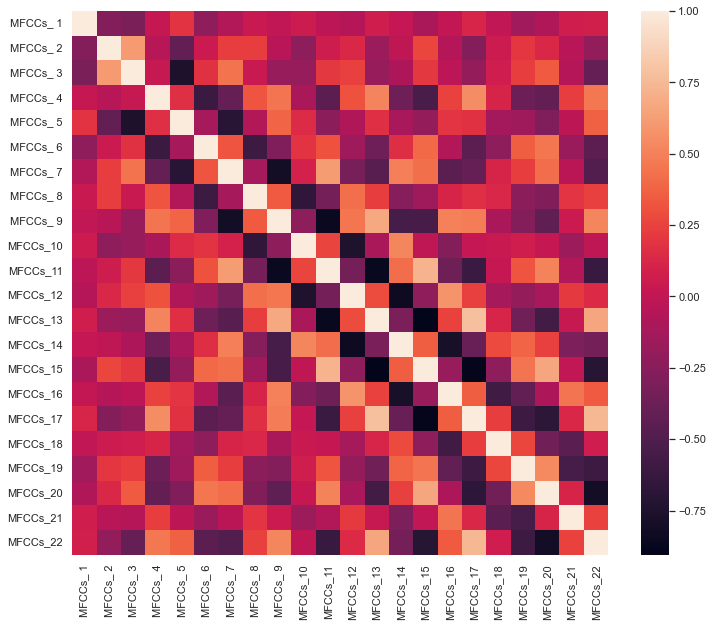

In [8]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

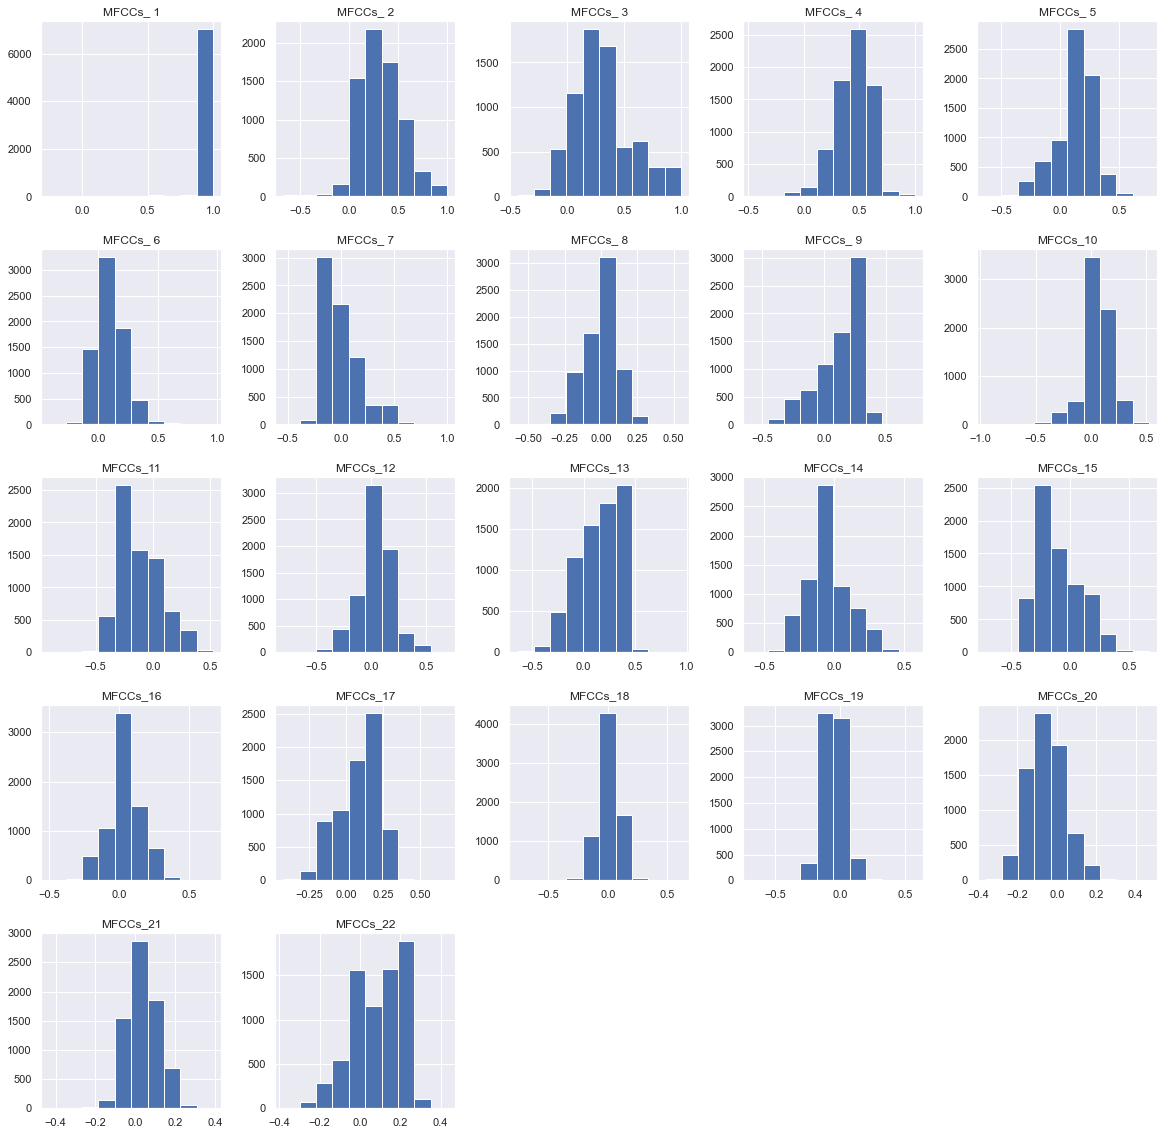

In [9]:
from matplotlib import pyplot as plt
data.hist(figsize=(20,20))
plt.show()

In [10]:
#checking if there are any null valus in the dataset
data.isnull().sum()

MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Species     0
dtype: int64

In [11]:
#checking if there are any missing values in a row
data[data.isnull().any(axis=1)]

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Species


In [12]:
#splitting the dataframe into X and y
X = data.iloc[:,0:22]
y = data.iloc[:,-1]

In [13]:
X.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


In [14]:
y.head()

0    AdenomeraAndre
1    AdenomeraAndre
2    AdenomeraAndre
3    AdenomeraAndre
4    AdenomeraAndre
Name: Species, dtype: object

## Feature Selection

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
forward_feature_selection = SequentialFeatureSelector(KNeighborsClassifier(n_neighbors=1),
                                                     k_features = 10,
                                                     forward = True,
                                                     floating = False,
                                                     verbose = 2,
                                                     scoring = "accuracy",
                                                     cv=5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    7.9s finished

[2022-05-28 23:41:09] Features: 1/10 -- score: 0.6061519572352545[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    8.3s finished

[2022-05-28 23:41:17] Features: 2/10 -- score: 0.7930852700550246[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    8.2s finished

[2022-05-28 23:41:25] Features: 3/10 -- score: 0.9021889178492133[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [18]:
#checking the index of the feature that have the highest score
forward_feature_selection.k_feature_idx_

(1, 2, 3, 7, 8, 9, 12, 13, 16, 21)

In [19]:
#checking the names of the features with the highest score
forward_feature_selection.k_feature_names_

('MFCCs_ 2',
 'MFCCs_ 3',
 'MFCCs_ 4',
 'MFCCs_ 8',
 'MFCCs_ 9',
 'MFCCs_10',
 'MFCCs_13',
 'MFCCs_14',
 'MFCCs_17',
 'MFCCs_22')

In [20]:
#checking the accuracy
forward_feature_selection.k_score_

0.9841900762621874

In [21]:
#converting the forward feature selection results into a dataframe
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict())

,1,2,3,4,5,6,7,8,9,10
feature_idx,"(12,)","(2, 12)","(2, 12, 13)","(2, 7, 12, 13)","(2, 7, 8, 12, 13)","(1, 2, 7, 8, 12, 13)","(1, 2, 3, 7, 8, 12, 13)","(1, 2, 3, 7, 8, 12, 13, 21)","(1, 2, 3, 7, 8, 12, 13, 16, 21)","(1, 2, 3, 7, 8, 9, 12, 13, 16, 21)"
cv_scores,"[0.5954861111111112, 0.5986099044309297, 0.615...","[0.7942708333333334, 0.7819287576020851, 0.803...","[0.9027777777777778, 0.8992180712423979, 0.900...","[0.9513888888888888, 0.946133796698523, 0.9461...","[0.9678819444444444, 0.9600347523892268, 0.960...","[0.9730902777777778, 0.9695916594265855, 0.967...","[0.9800347222222222, 0.9748045178105995, 0.972...","[0.9835069444444444, 0.9817549956559514, 0.974...","[0.9878472222222222, 0.9852302345786272, 0.979...","[0.9861111111111112, 0.9852302345786272, 0.978..."
avg_score,0.606152,0.793085,0.902189,0.945273,0.962821,0.970986,0.976372,0.980542,0.983668,0.98419
feature_names,"(MFCCs_13,)","(MFCCs_ 3, MFCCs_13)","(MFCCs_ 3, MFCCs_13, MFCCs_14)","(MFCCs_ 3, MFCCs_ 8, MFCCs_13, MFCCs_14)","(MFCCs_ 3, MFCCs_ 8, MFCCs_ 9, MFCCs_13, MFCCs...","(MFCCs_ 2, MFCCs_ 3, MFCCs_ 8, MFCCs_ 9, MFCCs...","(MFCCs_ 2, MFCCs_ 3, MFCCs_ 4, MFCCs_ 8, MFCCs...","(MFCCs_ 2, MFCCs_ 3, MFCCs_ 4, MFCCs_ 8, MFCCs...","(MFCCs_ 2, MFCCs_ 3, MFCCs_ 4, MFCCs_ 8, MFCCs...","(MFCCs_ 2, MFCCs_ 3, MFCCs_ 4, MFCCs_ 8, MFCCs..."
ci_bound,0.011,0.01202,0.003974,0.006638,0.005497,0.002611,0.004025,0.004558,0.003701,0.003959
std_dev,0.008558,0.009352,0.003092,0.005165,0.004277,0.002031,0.003132,0.003546,0.002879,0.003081
std_err,0.004279,0.004676,0.001546,0.002582,0.002139,0.001016,0.001566,0.001773,0.00144,0.00154


## K-Neigbors Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

X = X[['MFCCs_ 2','MFCCs_ 3','MFCCs_ 4','MFCCs_ 8','MFCCs_ 9','MFCCs_10',
                 'MFCCs_13','MFCCs_14','MFCCs_17','MFCCs_22']]
X_train = X_train[['MFCCs_ 2','MFCCs_ 3','MFCCs_ 4','MFCCs_ 8','MFCCs_ 9','MFCCs_10',
                   'MFCCs_13','MFCCs_14','MFCCs_17','MFCCs_22']]
X_test = X_test[['MFCCs_ 2','MFCCs_ 3','MFCCs_ 4','MFCCs_ 8','MFCCs_ 9','MFCCs_10',
                 'MFCCs_13','MFCCs_14','MFCCs_17','MFCCs_22']]

In [23]:
#classification with the default value(k)
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
#accuracy score, confusion matrix, accuracy, recall, precision and F1-score of default value(k)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)
print("Accuracy score is ",accuracy)
print()
print()
print()
print("Confusion Matrix")
print(confusion)
print()
print()
print()
print("Accuracy, Recall, Precision and F1-score")
print(classification)

Accuracy score is  0.9770674079221682



Confusion Matrix
[[133   0   2   2   0   1   0   1   0   0]
 [  0 696   0   0   0   0   0   0   0   0]
 [  0   0  94   1   0   0   0   0   0   0]
 [  1   4   0  63   0   0   0   0   0   0]
 [  0   0   0   0  97   0   0   1   0   0]
 [  0   2   0   1   4 213   5   1   0   0]
 [  0   0   0   0   1   1  51   0   0   0]
 [  1   0   0   0   3   1   0  15   0   0]
 [  0   0   0   0   0   0   0   0  13   0]
 [  0   0   0   0   0   0   0   0   0  31]]



Accuracy, Recall, Precision and F1-score
                        precision    recall  f1-score   support

        AdenomeraAndre       0.99      0.96      0.97       139
AdenomeraHylaedactylus       0.99      1.00      1.00       696
    Ameeregatrivittata       0.98      0.99      0.98        95
            HylaMinuta       0.94      0.93      0.93        68
  HypsiboasCinerascens       0.92      0.99      0.96        98
     HypsiboasCordobae       0.99      0.94      0.96       226
   LeptodactylusFu

In [25]:
#splitting the dataset into training, validation and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(4604, 10)
(1152, 10)
(1439, 10)


Best value of k is:  1


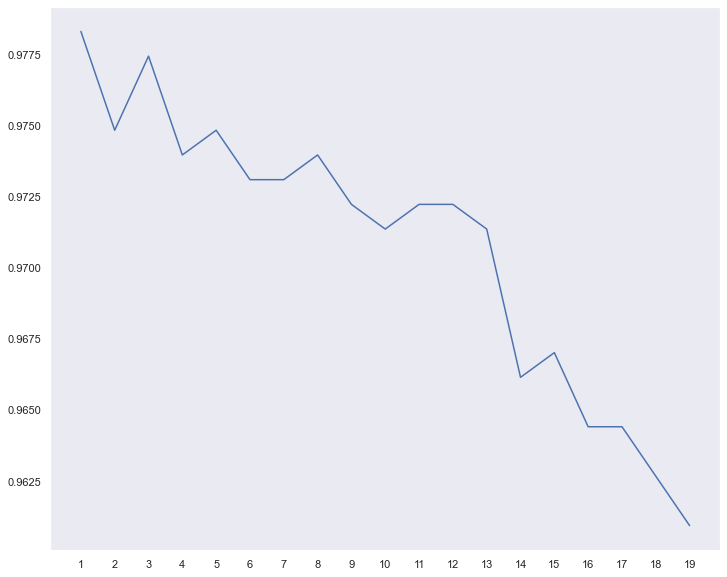

Maximum score is:  0.9782986111111112


In [30]:
#finding the best value of k
from matplotlib import pyplot as plt
scores = []
max_score = 0
best_k = 0
for k in range(1,20):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    score = model_knn.score(X_val, y_val)
    if score > max_score:
        max_score = score
        best_k = k
    scores.append(score)
    
print("Best value of k is: ",best_k)
plt.plot(np.arange(1,20), scores)
plt.xticks(np.arange(1,20))
plt.grid()
plt.show()
print("Maximum score is: ",max(scores))

In [27]:
#accuracy score, confusion matrix, accuracy, recall, precision and F1-score of best value(k)
model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)
print("Accuracy score is ",accuracy)
print()
print()
print("Confusion Matrix")
print(confusion)
print()
print()
print("Accuracy, Recall, Precision and F1-score")
print(classification)


Accuracy score is  0.9784572619874913


Confusion Matrix
[[134   0   0   3   0   1   0   1   0   0]
 [  0 696   0   0   0   0   0   0   0   0]
 [  0   0  94   1   0   0   0   0   0   0]
 [  0   3   0  65   0   0   0   0   0   0]
 [  0   0   0   0  97   0   0   1   0   0]
 [  0   3   0   1   7 211   3   1   0   0]
 [  0   0   0   0   1   1  51   0   0   0]
 [  0   0   0   0   3   1   0  16   0   0]
 [  0   0   0   0   0   0   0   0  13   0]
 [  0   0   0   0   0   0   0   0   0  31]]


Accuracy, Recall, Precision and F1-score
                        precision    recall  f1-score   support

        AdenomeraAndre       1.00      0.96      0.98       139
AdenomeraHylaedactylus       0.99      1.00      1.00       696
    Ameeregatrivittata       1.00      0.99      0.99        95
            HylaMinuta       0.93      0.96      0.94        68
  HypsiboasCinerascens       0.90      0.99      0.94        98
     HypsiboasCordobae       0.99      0.93      0.96       226
   LeptodactylusFusc

# Target variable (Expected vs Predicted)

In [28]:
pred = model_knn.predict(X_test)

In [29]:
output = pd.DataFrame()
output['Expected Output'] = y_test
output['Predicted Output'] = pred
print(output.to_string())

             Expected Output        Predicted Output
7065             ScinaxRuber             ScinaxRuber
4872              HylaMinuta              HylaMinuta
4034  AdenomeraHylaedactylus  AdenomeraHylaedactylus
1281  AdenomeraHylaedactylus  AdenomeraHylaedactylus
5320    HypsiboasCinerascens    HypsiboasCinerascens
5745       HypsiboasCordobae       HypsiboasCordobae
454           AdenomeraAndre          AdenomeraAndre
1014      Ameeregatrivittata      Ameeregatrivittata
3457  AdenomeraHylaedactylus  AdenomeraHylaedactylus
451           AdenomeraAndre          AdenomeraAndre
5094    HypsiboasCinerascens    HypsiboasCinerascens
296           AdenomeraAndre          AdenomeraAndre
1702  AdenomeraHylaedactylus  AdenomeraHylaedactylus
3930  AdenomeraHylaedactylus  AdenomeraHylaedactylus
4539  AdenomeraHylaedactylus  AdenomeraHylaedactylus
4676  AdenomeraHylaedactylus  AdenomeraHylaedactylus
5947       HypsiboasCordobae       HypsiboasCordobae
2709  AdenomeraHylaedactylus  AdenomeraHylaeda